In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.linear_model import LinearRegression

In [2]:
tips = sns.load_dataset("tips")

In [4]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.3 KB


In [7]:
X = tips[['total_bill','sex','smoker','day','time','size']]

In [11]:
y = tips[['tip']]

In [13]:
X.head()

,total_bill,sex,smoker,day,time,size
0,16.99,Female,No,Sun,Dinner,2
1,10.34,Male,No,Sun,Dinner,3
2,21.01,Male,No,Sun,Dinner,3
3,23.68,Male,No,Sun,Dinner,2
4,24.59,Female,No,Sun,Dinner,4


In [14]:
y.head()

,tip
0,1.01
1,1.66
2,3.50
3,3.31
4,3.61


In [27]:
model = LinearRegression(normalize=True)

In [15]:
model.fit(X, y)

ValueError: could not convert string to float: 'Female'

In [21]:
X_new = pd.get_dummies(X, drop_first=True)

In [22]:
X_new.head()

,total_bill,size,sex_Female,smoker_No,day_Fri,day_Sat,day_Sun,time_Dinner
0,16.99,2,1,1,0,0,1,1
1,10.34,3,0,1,0,0,1,1
2,21.01,3,0,1,0,0,1,1
3,23.68,2,0,1,0,0,1,1
4,24.59,4,1,1,0,0,1,1


In [39]:
model.fit(X_new, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [40]:
model.coef_

array([[ 0.09448701,  0.175992  ,  0.03244094,  0.08640832,  0.1622592 ,
         0.04080082,  0.13677854, -0.0681286 ]])

In [41]:
model.score(X_new, y)

0.47007812322060794

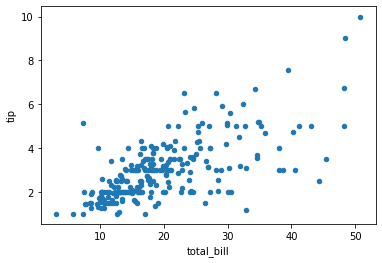

In [42]:
tips.plot.scatter(x='total_bill', y='tip')